![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\nahue\Searches\Escritorio\CARRERA HENRY\M6\Proyecto Integrador\BBDD_Hospitalizacion_listo_para_modelar.csv")
#Le tuve que colocar la r por delante a la dirección del archivo porque me daba error de sintaxis 'unicodeescape'

df.head()

,FIEBRE,ITU,HOSPITALIZACION,EDAD_norm,PSA_norm,NUMERO_DE_MUESTRAS_TOMADAS_norm,NUMERO_DE_DIAS_POST_BIOPSIA_norm,"Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",Patron de Resistencia_MULTI SENSIBLE,"Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA",Tipo de Cultivo_HEMOCULTIVO,Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO,Agente Aislado_E.COLI,Agente Aislado_NO
0,1,0,1,-1.145870,-0.927426,-0.318613,1.096669,0,0,0,0,0,0,1
1,1,0,1,-0.820639,-0.367534,-0.318613,1.096669,0,0,0,0,0,0,1
2,1,0,1,-0.712229,2.855627,2.790152,1.096669,1,0,0,1,0,1,0
3,1,0,1,-0.820639,-0.473460,-0.318613,1.096669,0,0,0,0,0,0,1
4,1,0,1,-0.929049,2.855627,2.790152,1.096669,0,0,0,1,0,1,0


Separen el dataset en X, y (variable objetivo)

In [3]:
# Muevo la columna 'HOSPITALIZACION' al final 
columna = df.pop('HOSPITALIZACION') 
df.insert(len(df.columns), 'HOSPITALIZACION', columna)
 
df

,FIEBRE,ITU,EDAD_norm,PSA_norm,NUMERO_DE_MUESTRAS_TOMADAS_norm,NUMERO_DE_DIAS_POST_BIOPSIA_norm,"Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",Patron de Resistencia_MULTI SENSIBLE,"Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA",Tipo de Cultivo_HEMOCULTIVO,Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO,Agente Aislado_E.COLI,Agente Aislado_NO,HOSPITALIZACION
0,1,0,-1.145870,-0.927426,-0.318613,1.096669,0,0,0,0,0,0,1,1
1,1,0,-0.820639,-0.367534,-0.318613,1.096669,0,0,0,0,0,0,1,1
2,1,0,-0.712229,2.855627,2.790152,1.096669,1,0,0,1,0,1,0,1
3,1,0,-0.820639,-0.473460,-0.318613,1.096669,0,0,0,0,0,0,1,1
4,1,0,-0.929049,2.855627,2.790152,1.096669,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0,0,0.697107,1.191083,-0.318613,-0.183617,0,0,0,0,0,0,1,0
505,0,0,-0.712229,-0.806369,-0.318613,-0.183617,0,0,0,0,0,0,1,0
506,0,0,1.564390,-0.125419,-0.318613,-0.183617,0,0,0,0,0,0,1,0
507,0,0,0.371875,-0.624782,-0.318613,-0.183617,0,0,0,0,0,0,1,0


In [4]:
X = df.iloc[:,:-1].values # Obtenemos los valores de todas las columnas menos "HOSPITALIZACION"

y = df.iloc[:, -1].values # Obtenemos los valores de "HOSPITALIZACION"

Separen el dataset en X_train, X_test, y_train y y_test

In [5]:
X.shape

(509, 13)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(305, 13) (305,) (204, 13) (204,)


In [73]:
from imblearn.over_sampling import SMOTE #Aplico SMOTE para balancear las clases en el conjunto de entrenamiento ya que estan muy desbalanceadas

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verifico las nuevas distribuciones de clases
print(f"Distribución original de clases: {np.bincount(y_train)}")
print(f"Distribución después de SMOTE: {np.bincount(y_train_resampled)}")


Distribución original de clases: [295  10]
Distribución después de SMOTE: [295 295]


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [74]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 42, max_depth=4) #Instanciamos

classifier.fit(X_train_resampled, y_train_resampled) #Entrenamos

DecisionTreeClassifier(max_depth=4, random_state=42)

In [75]:
# Predecimos sobre nuestro set de testeo
y_pred = classifier.predict(X_test)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [76]:
from sklearn.metrics import confusion_matrix
matrix_test = confusion_matrix(y_test, y_pred)

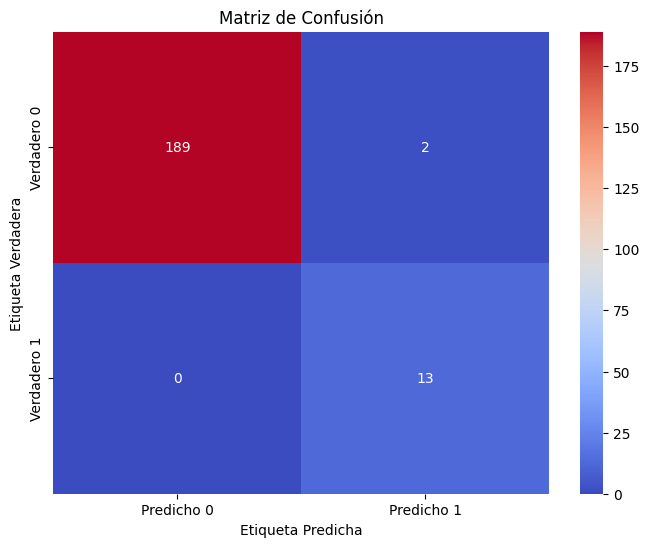

In [77]:
# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_test, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Predicho 0', 'Predicho 1'], yticklabels=['Verdadero 0', 'Verdadero 1'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


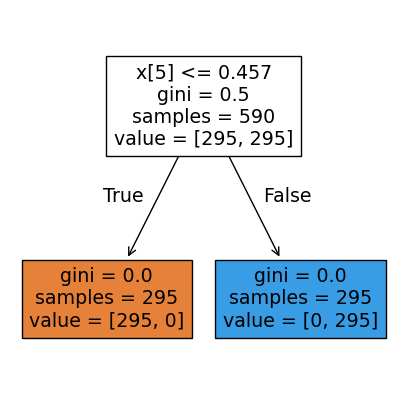

In [78]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
tree.plot_tree(classifier, filled=True)
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

accuracy_score:
Calcula la proporción de predicciones correctas sobre el total de predicciones. Esto indica qué tan frecuentemente el modelo acierta en sus predicciones en general.

f1_score:
Calcula la media armónica entre la precisión y el recall. Es particularmente útil en este caso de clases desbalanceadas, ya que proporciona una medida más equilibrada del rendimiento.

roc_auc_score:
Calcula el área bajo la curva ROC, que es una métrica agregada considerando todas las posibles predicciones. Un valor alto de AUC-ROC (cercano a 1) indica un excelente rendimiento del modelo, mientras que un valor cercano a 0.5 sugiere un rendimiento comparable al azar.

In [79]:
from sklearn.metrics import accuracy_score, f1_score

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Calcular el puntaje F1
f1 = f1_score(y_test, y_pred)
print(f'Puntaje F1: {f1:.2f}')


Precisión: 0.99
Puntaje F1: 0.93


In [80]:
from sklearn.metrics import roc_auc_score

#Calculamos las probabilidades para la clase positiva (habitualmente etiquetada como '1') en la métrica AUC-ROC porque esta métrica evalúa el rendimiento del modelo en términos
#de su capacidad para distinguir entre las clases positiva y negativa en diferentes umbrales de decisión.

y_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# Calculo el AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc:.2f}')

AUC-ROC: 0.99


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [81]:
# Obtener las importancias de las características
importancia = classifier.feature_importances_
print(f'Importancias de las características: {importancia}')

Importancias de las características: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


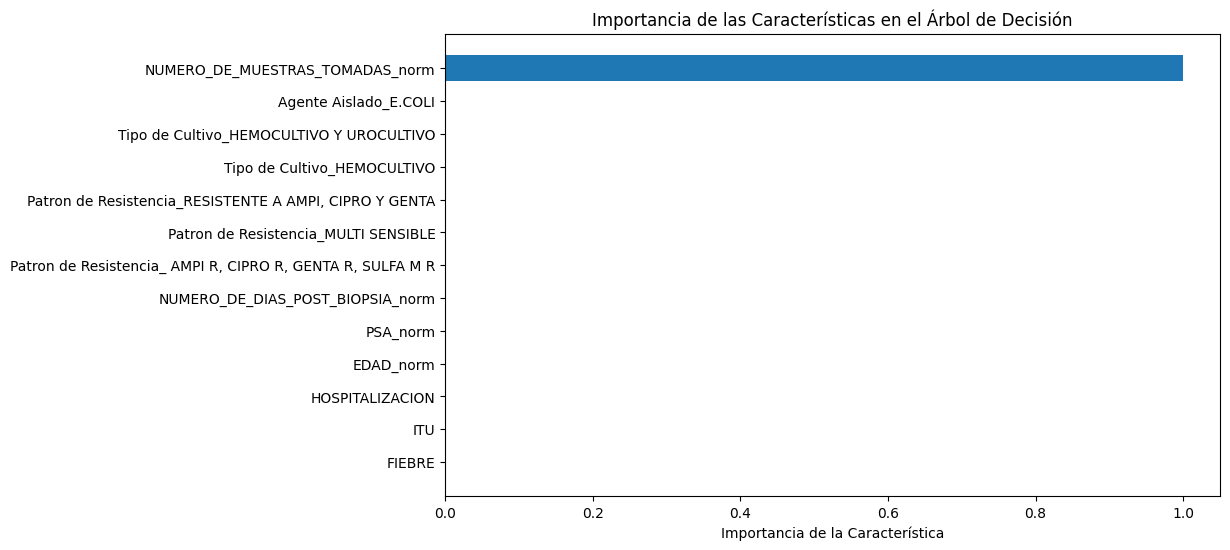

In [69]:
# Crear un gráfico de barras para visualizar la importancia de las características
nombre_caracteristica = ['FIEBRE', 'ITU', 'HOSPITALIZACION', 'EDAD_norm','PSA_norm','NUMERO_DE_MUESTRAS_TOMADAS_norm', 'NUMERO_DE_DIAS_POST_BIOPSIA_norm',
'Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R', 'Patron de Resistencia_MULTI SENSIBLE','Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA',
'Tipo de Cultivo_HEMOCULTIVO','Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO', 'Agente Aislado_E.COLI','Agente Aislado_NO']

indices = np.argsort(importancia)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importancia)), importancia[indices], align='center')
plt.yticks(range(len(importancia)), [nombre_caracteristica[i] for i in indices])
plt.xlabel('Importancia de la Característica')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.show()


In [ ]:
#ALGO ESTA MAL!!. Llegué hasta acá sin resamplear las caracteristicas, resampleé y probé cambiando la distribución del split en 20, 30 y 40% y sigue todo igual.

In [17]:
variability = df.std()
print(variability)

#La variabilidad me dice qué tanto varían los valores de cada característica en el dataset, es decir, la dispersión de los datos alrededor de la media para cada característica.

#Alta Variabilidad: Una alta desviación estándar (std) significa que los valores de esa característica están muy dispersos.
#Esto generalmente indica que la característica tiene valores diferentes y puede ser útil para el modelo porque contiene información relevante.

#Baja Variabilidad: Una baja desviación estándar indica que los valores de esa característica están muy cercanos entre sí.
#Esto podría significar que la característica no está proporcionando mucha información nueva al modelo, ya que casi todos los datos son similares.

FIEBRE                                                        0.256620
ITU                                                           0.108036
EDAD_norm                                                     1.000984
PSA_norm                                                      1.000984
NUMERO_DE_MUESTRAS_TOMADAS_norm                               1.000984
NUMERO_DE_DIAS_POST_BIOPSIA_norm                              1.000984
Patron de Resistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R    0.044324
Patron de Resistencia_MULTI SENSIBLE                          0.062622
Patron de Resistencia_RESISTENTE A AMPI, CIPRO Y GENTA        0.062622
Tipo de Cultivo_HEMOCULTIVO                                   0.062622
Tipo de Cultivo_HEMOCULTIVO Y UROCULTIVO                      0.062622
Agente Aislado_E.COLI                                         0.108036
Agente Aislado_NO                                             0.124501
HOSPITALIZACION                                               0.207918
dtype:

In [ ]:
'''NO entiendo por qué, entonces, los valores que comienzan con 1 no figuran como importantes en el gráfico.'''

In [ ]:
#También probé con un archivo sin tanto filtrado, cambiando entropia por gini, y modificando la profundidad del arbol dejando las caracteristicas redundantes y me pasa
#los mismo con la misma caracteristica.

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [82]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de parámetros para `max_depth`
param_grid = {'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Mejor modelo encontrado
best_clf = grid_search.best_estimator_

# Imprimir los mejores parámetros
print(f"Mejor valor para max_depth: {grid_search.best_params_['max_depth']}")

# Entrenar el mejor modelo y hacer predicciones
best_clf.fit(X_train_resampled, y_train_resampled)
y_pred = best_clf.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del mejor modelo: {accuracy:.2f}')


Mejor valor para max_depth: None
Precisión del mejor modelo: 0.99


In [ ]:
#Siempre me da que el mejor valor de max_depth es el primero de la lista, es decir, si borro None, me da 1, si borro 1, me da 2 y así sucesivamente.

#Grafico un ajuste del arbol de decisión

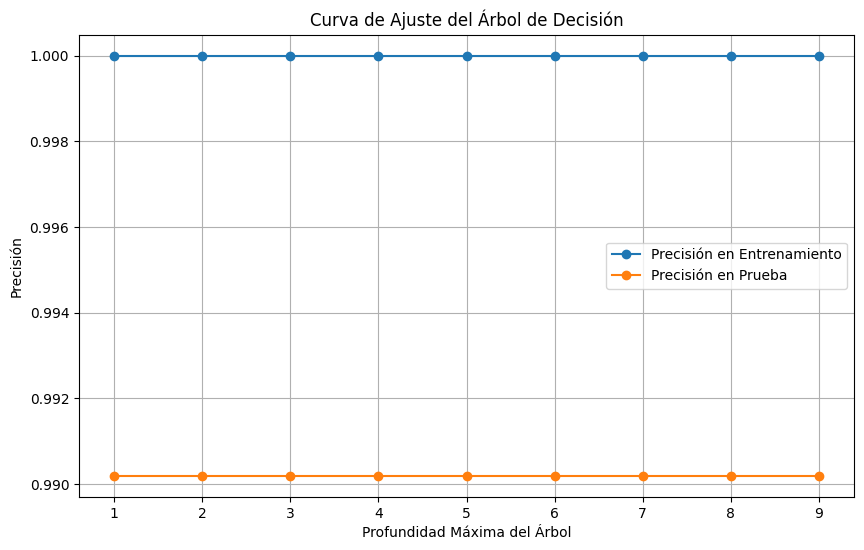

Precisión en Entrenamiento: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Precisión en Prueba: [0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726, 0.9901960784313726]


In [84]:
# Rango de profundidades a probar
max_depths = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Almacenar resultados
train_accuracies = []
test_accuracies = []

for max_depth in max_depths:
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    classifier.fit(X_train_resampled, y_train_resampled)
    
    # Calcular precisión en el conjunto de entrenamiento
    train_pred = classifier.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calcular precisión en el conjunto de prueba
    test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths[:-1], train_accuracies[:-1], label='Precisión en Entrenamiento', marker='o')
plt.plot(max_depths[:-1], test_accuracies[:-1], label='Precisión en Prueba', marker='o')
plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('Precisión')
plt.title('Curva de Ajuste del Árbol de Decisión')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir las precisiones para verificar
print("Precisión en Entrenamiento:", train_accuracies)
print("Precisión en Prueba:", test_accuracies)


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar un modelo K-Nearest Neighbors con una cantidad arbitraria de vecinos (por ejemplo, k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo KNN
knn.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[189   2]
 [  0  13]]


Encuentre el valor óptimo para k

El mejor valor para k es: 1


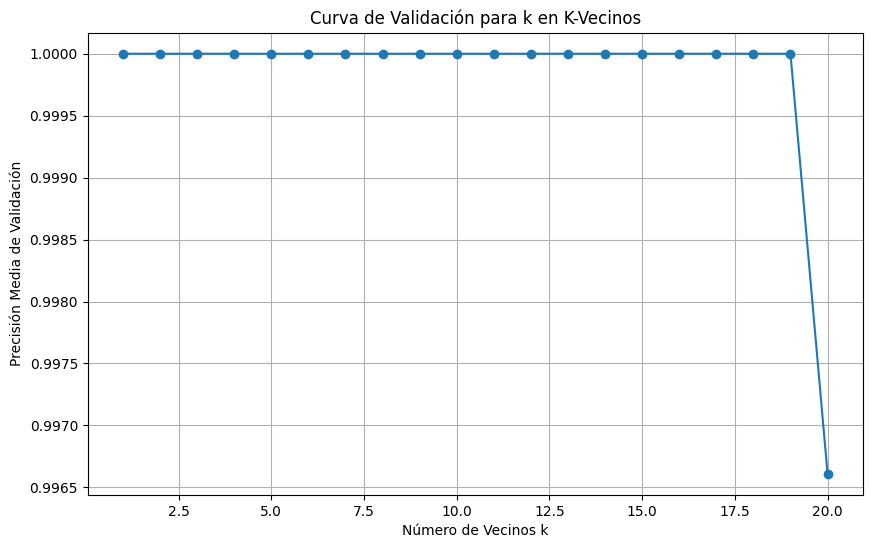

In [86]:
from sklearn.model_selection import cross_val_score

# Definir el rango de valores para `k`
k_values = range(1, 21)  # Por ejemplo, probamos valores de 1 a 20
mean_accuracies = []

# Evaluar el modelo para cada valor de `k` usando validación cruzada
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    mean_accuracies.append(scores.mean())

# Encontrar el mejor valor de `k`
best_k = k_values[np.argmax(mean_accuracies)]
print(f"El mejor valor para k es: {best_k}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel('Número de Vecinos k')
plt.ylabel('Precisión Media de Validación')
plt.title('Curva de Validación para k en K-Vecinos')
plt.grid(True)
plt.show()


Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [90]:
# Calcular y mostrar las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')
print(f'Puntaje F1: {f1:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')

Precisión: 0.99
Puntaje F1: 0.93
AUC-ROC: 0.99


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

In [ ]:
#Por lo que vimos durante todo el módulo, los valores de las métricas que obtuve tanto en árboles de decisión como en k-vecinos son propias de un overfitting.
#Pero como fui explicando mas arriba, probé modificando variables, hiperparámetros y resampleando y no obtuve cambios.

No hago el README porque no puedo concluir nada con los valores obtenidos.

R/

# Necesitaría que me hagan un feed con el ó los errores que cometí a fin de aprender y que no me vuelvan a suceder por favor